In [1]:
%matplotlib inline

In [2]:
# Raw data: jack height [mm], B_relative [uT].

# From 2016-07-27
down_near = [
    (59.5, -40.5),
    (70.5, -46.7),
    (80.5, -53.0),
    (89.5, -60.1),
    (99.0, -70.1),
    (110.0, -82.4),
    (119.0, -94.7),
    (129.5, -114.7),
    (139.5, -135.4),
    (150.0, -165.3),
    (160.0, -203.4),
    (170.0, -251.9),
    (179.5, -314.0)]
up_near = [
    (60.0, 40.5),
    (70.0, 46.3),
    (80.5, 54.3),
    (90.0, 61.3),
    (100.0, 70.7),
    (109.5, 82.0),
    (119.0, 96.1),
    (130.0, 115.3),
    (139.5, 137.0),
    (149.5, 165.3),
    (160.0, 203.7),
    (170.0, 253.3),
    (180.0, 315.4)]

# From 2016-08-23
down_far = [
    (80.0, -3.8),
    (100.0, -4.2),
    (120.0, -4.8),
    (140.0, -4.6),
    (160.0, -5.9),
    (180.0, -6.2),
    (200.0, -7.2),
    (220.0, -8.9),
    (240.0, -10.0),
    (260.0, -11.5),
    (270.0, -12.3)]
up_far = [
    (80.0, 2.9),
    (100.0, 3.3),
    (119.5, 3.6),
    (140.0, 4.6),
    (160.5, 4.7),
    (180.0, 6.3),
    (200.0, 7.2),
    (220.0, 8.1),
    (240.0, 9.9),
    (260.0, 11.1),
    (270.0, 11.8)]


probe_tip_to_hall_sensor = 0.38
block_thickness_mm = 25.5  # both blocks are the same thickness
magnet_half_thickness_mm = 1.5  # the magnets are about 3 mm thick

near_probe_height_mm = 319.5 + probe_tip_to_hall_sensor
down_near_jack_height_mm = np.array([p[0] for p in down_near])
down_near_B_relative_uT = np.array([p[1] for p in down_near])
up_near_jack_height_mm = np.array([p[0] for p in up_near])
up_near_B_relative_uT = np.array([p[1] for p in up_near])

far_probe_height_mm = 647.0 + probe_tip_to_hall_sensor
down_far_jack_height_mm = np.array([p[0] for p in down_far])
down_far_B_relative_uT = np.array([p[1] for p in down_far])
up_far_jack_height_mm = np.array([p[0] for p in up_far])
up_far_B_relative_uT = np.array([p[1] for p in up_far])

down_near_d_mm = near_probe_height_mm - (down_near_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)
up_near_d_mm = near_probe_height_mm - (up_near_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)

down_far_d_mm = far_probe_height_mm - (down_far_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)
up_far_d_mm = far_probe_height_mm - (up_far_jack_height_mm + block_thickness_mm + magnet_half_thickness_mm)

In [11]:
down_d_mm = np.concatenate((down_far_d_mm, down_near_d_mm))
down_B_relative_uT = np.concatenate((down_far_B_relative_uT, down_near_B_relative_uT))
up_d_mm = np.concatenate((up_far_d_mm, up_near_d_mm))
up_B_relative_uT = np.concatenate((up_far_B_relative_uT, up_near_B_relative_uT))

In [8]:
up_color = 'blue'
down_color = 'red'

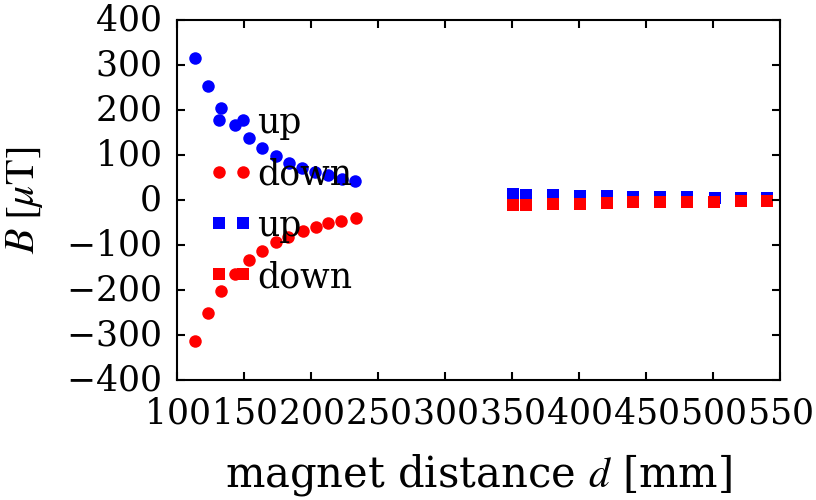

In [9]:
fig, ax = plt.subplots()
ax.set_xlabel('magnet distance $d$ [mm]')
ax.set_ylabel('$B \; [\mu \mathrm{T}]$')
ax.plot(up_near_d_mm, up_near_B_relative_uT, 'o', color=up_color, label='up')
ax.plot(down_near_d_mm, down_near_B_relative_uT, 'o', color=down_color, label='down')
ax.plot(up_far_d_mm, up_far_B_relative_uT, 's', color=up_color, label='up')
ax.plot(down_far_d_mm, down_far_B_relative_uT, 's', color=down_color, label='down')
ax.legend(loc='center left', ncol=1);

In [12]:
up_slope, up_offset = np.polyfit(up_d_mm**-3, up_B_relative_uT, 1)

In [13]:
up_offset

2.8906822832506855

In [14]:
up_slope

465062903.90875053

In [15]:
down_slope, down_offset = np.polyfit(down_d_mm**-3, down_B_relative_uT, 1)

In [16]:
down_offset

-2.9981581107094857

In [17]:
down_slope

-464679233.77140015

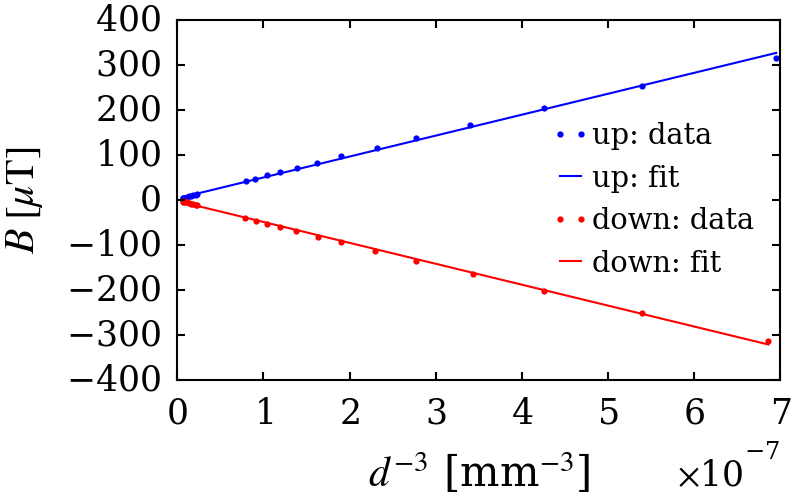

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel('$d^{-3}$ [mm$^{-3}$]')
ax.set_ylabel('$B \; [\mu \mathrm{T}]$')
ax.plot(up_d_mm**-3, up_B_relative_uT, '.', color=up_color, label='up: data')
ax.plot(up_d_mm**-3, np.polyval((up_slope, up_offset), up_d_mm**-3), '-', color=up_color, label='up: fit')
ax.plot(down_d_mm**-3, down_B_relative_uT, '.', color=down_color, label='down: data')
ax.plot(down_d_mm**-3, np.polyval((down_slope, down_offset), down_d_mm**-3), '-', color=down_color, label='down: fit')

ax.legend(loc='center right', fontsize='xx-small');

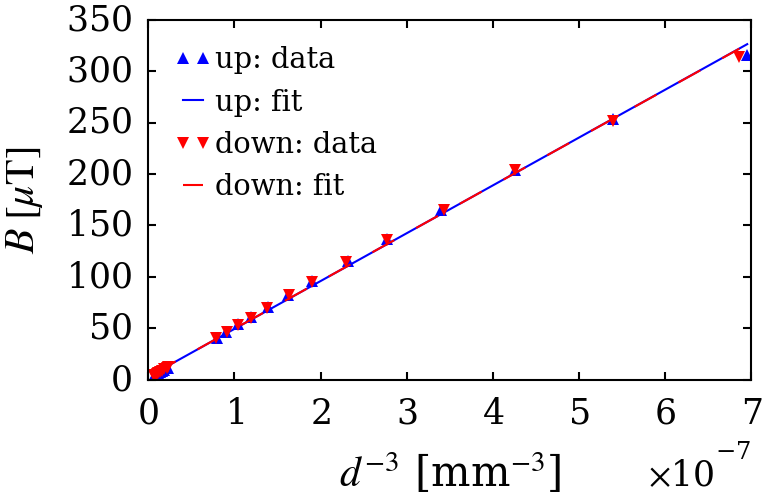

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel('$d^{-3}$ [mm$^{-3}$]')
ax.set_ylabel('$B \; [\mu \mathrm{T}]$')
ax.plot(up_d_mm**-3, up_B_relative_uT, '^', color=up_color, label='up: data')
ax.plot(up_d_mm**-3, np.polyval((up_slope, up_offset), up_d_mm**-3), '-', color=up_color, label='up: fit')
ax.plot(down_d_mm**-3, -down_B_relative_uT, 'v', color=down_color, label='down: data')
ax.plot(down_d_mm**-3, -np.polyval((down_slope, down_offset), down_d_mm**-3), '--', color=down_color, label='down: fit')
ax.legend(loc='upper left', fontsize='xx-small');

In [20]:
B = 10
d = (up_slope / (B - up_offset))**(1/3)
d

402.92844264146117

In [21]:
B = 10
d = (up_slope / (B - 0))**(1/3)
d

359.6145318302041

In [22]:
np.unique(up_d_mm)

array([ 112.88,  122.88,  132.88,  143.38,  153.38,  162.88,  173.88,
        183.38,  192.88,  202.88,  212.38,  222.88,  232.88,  350.38,
        360.38,  380.38,  400.38,  420.38,  440.38,  459.88,  480.38,
        500.88,  520.38,  540.38])